# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key
temp_units = "imperial"


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

url = "http://api.openweathermap.org/data/2.5/weather?"

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={api_key}&units={temp_units}&q="


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

623

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [ ]:
cityy = []
cloudiness = []
dates = []
humidity = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []

count_one = 0
set_one = 1

# loops for creating dataframe columns
for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        cloudiness.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        if count_one > 48:
            count_one = 1
            set_one += 1
            cityy.append(city)
        else:
            count_one += 1
            cityy.append(city)
        print(f"Processing Record {count_one} of Set {set_one} | {city}")
    except Exception:
        print("City not found. Skipping...")
print("------------------------------\nData Retrieval Complete\n------------------------------")

Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | esperance
Processing Record 3 of Set 1 | new norfolk
Processing Record 4 of Set 1 | kapaa
Processing Record 5 of Set 1 | lompoc
Processing Record 6 of Set 1 | ribeira grande
Processing Record 7 of Set 1 | jamestown
Processing Record 8 of Set 1 | yellowknife
Processing Record 9 of Set 1 | mataura
Processing Record 10 of Set 1 | pacific grove
Processing Record 11 of Set 1 | harindanga
Processing Record 12 of Set 1 | ust-nera
Processing Record 13 of Set 1 | hermanus
Processing Record 14 of Set 1 | tasiilaq
Processing Record 15 of Set 1 | victoria
Processing Record 16 of Set 1 | butaritari
Processing Record 17 of Set 1 | busselton
Processing Record 18 of Set 1 | east london
Processing Record 19 of Set 1 | vaini
City not found. Skipping...
Processing Record 20 of Set 1 | cape town
Processing Record 21 of Set 1 | aklavik
City not found. Skipping...
Processing Record 22 of Set 1 | plouzane
Processing Record 23 of Set 1 | ko

Processing Record 33 of Set 4 | russell
Processing Record 34 of Set 4 | kaitangata
Processing Record 35 of Set 4 | craig
Processing Record 36 of Set 4 | seabra
Processing Record 37 of Set 4 | yinchuan
Processing Record 38 of Set 4 | khuzhir
Processing Record 39 of Set 4 | skelleftea
Processing Record 40 of Set 4 | bumba
Processing Record 41 of Set 4 | yakima
Processing Record 42 of Set 4 | sabha
Processing Record 43 of Set 4 | wiarton
Processing Record 44 of Set 4 | lagoa
Processing Record 45 of Set 4 | luderitz
Processing Record 46 of Set 4 | kaihua
Processing Record 47 of Set 4 | mehamn
City not found. Skipping...
City not found. Skipping...
Processing Record 48 of Set 4 | meulaboh
Processing Record 49 of Set 4 | fayetteville
Processing Record 1 of Set 5 | vila velha
Processing Record 2 of Set 5 | deseronto
Processing Record 3 of Set 5 | alice springs
Processing Record 4 of Set 5 | teguise
Processing Record 5 of Set 5 | lorengau
Processing Record 6 of Set 5 | old road
Processing Reco

Processing Record 19 of Set 8 | tynda
Processing Record 20 of Set 8 | pontian kecil
Processing Record 21 of Set 8 | luan
Processing Record 22 of Set 8 | toora-khem
Processing Record 23 of Set 8 | pemba
Processing Record 24 of Set 8 | ostrovnoy
Processing Record 25 of Set 8 | katsuura
Processing Record 26 of Set 8 | lata
Processing Record 27 of Set 8 | anito
Processing Record 28 of Set 8 | akhisar
Processing Record 29 of Set 8 | broome
Processing Record 30 of Set 8 | juegang
City not found. Skipping...
Processing Record 31 of Set 8 | dayong
Processing Record 32 of Set 8 | panjakent
Processing Record 33 of Set 8 | nanortalik
Processing Record 34 of Set 8 | saint-georges
Processing Record 35 of Set 8 | bagacay
Processing Record 36 of Set 8 | vostok
Processing Record 37 of Set 8 | belovo
City not found. Skipping...
Processing Record 38 of Set 8 | praya
Processing Record 39 of Set 8 | clyde
Processing Record 40 of Set 8 | dharchula
Processing Record 41 of Set 8 | fuxin
Processing Record 42 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [ ]:
weather_facts = {
    "City":cityy,
    "Cloudiness":cloudiness,
    "Country":countries,
    "Date":dates,
    "Humidity":humidity,
    "Lat":lats,
    "Lng":lngs,
    "Max Temp":max_temps,
    "Wind Speed":wind_speeds
}

weather_dataframe = pd.DataFrame(weather_facts)
weather_dataframe.head()

In [ ]:
weather_dataframe.to_csv("output_data_file", encoding='utf-8', index=False)

#weather_dataframe.count()

In [ ]:
weather_dataframe.head()

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

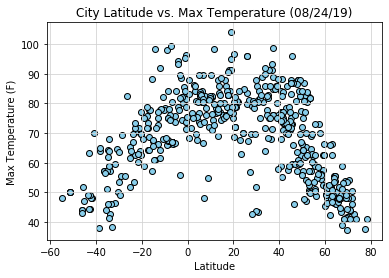

In [11]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Max Temp"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Max Temperature (08/24/19)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.show()

#### Latitude vs. Humidity Plot

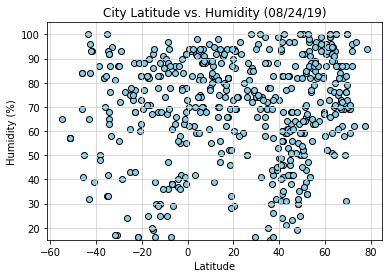

In [12]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Humidity"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Humidity (08/24/19)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(15,105)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.show()

#### Latitude vs. Cloudiness Plot

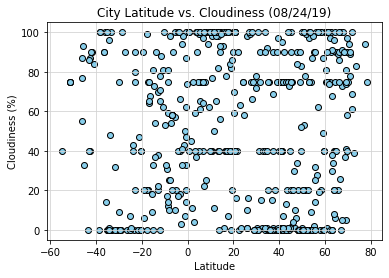

In [13]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Cloudiness"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Cloudiness (08/24/19)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.show()

#### Latitude vs. Wind Speed Plot

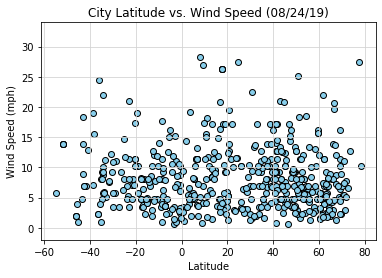

In [14]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Wind Speed"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Wind Speed (08/24/19)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(-2,34)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.show()